In [1]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.base import clone
import joblib
import pickle
import matplotlib.pyplot as plt
import doubleml as dml
import patsy
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dates= pd.date_range('2017-01-01','2021-07-01' , freq='1M')-pd.offsets.MonthBegin(1)
dates=[date_obj.strftime('%Y-%m-%d') for date_obj in dates]

var_quel=["emploi_quelconque_t_plus_3","emploi_quelconque_t_plus_6",  "emploi_quelconque_t_plus_12" ,"emploi_quelconque_t_plus_18" ,"emploi_quelconque_t_plus_24","emploi_quelconque_t_plus_36"]

x_cols=["age", "anciennete","sexe","zone_urbaine","handicap" ]

path="C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données"

In [3]:


dic_irm={}





dic_irm["cohorte"]=dates



for var in var_quel:
    irm_coef=[]

    irm_upp=[]
    irm_low=[]
  
    irm_std=[]
    
    
    for cohorte in dates:
     
      
        
        dml_irm_obj=joblib.load( path+"/Résultats/Python/IRM/Certif/dml_irm_certif_"+cohorte+"_"+var+".joblib")
        irm_coef.append(dml_irm_obj.summary.coef)
        irm_low.append(dml_irm_obj.confint()["2.5 %"])
        irm_upp.append(dml_irm_obj.confint()["97.5 %"])
        irm_std.append(dml_irm_obj.summary["std err"])
        
        
   
    dic_irm["coef_"+var]=irm_coef
    dic_irm["upp_"+var]=irm_upp
    dic_irm["low_"+var]=irm_low
    dic_irm["std_"+var]=irm_std
    
    
 

   
df_irm=pd.DataFrame.from_dict(dic_irm,orient="columns")





In [4]:

data_cf=pd.read_csv("C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données/Résultats/tab_cf.csv",index_col=0)

data_cf.set_index(data_cf["cohorte"],inplace=True)
for var in var_quel:
    data_cf["upp_"+var]=data_cf["ate_"+var]+1.96*np.abs(data_cf["std_"+var])
    data_cf["low_"+var]=data_cf["ate_"+var]-1.96*np.abs(data_cf["std_"+var])



dic_cf={}





dic_cf["cohorte"]=dates



for var in var_quel:
    cf_coef=[]

    cf_upp=[]
    cf_low=[]
    cf_std=[]
    
        
    
    
    for cohorte in dates:
     
      
        
      
        cf_coef.append(data_cf.loc[cohorte,"ate_"+var])
        cf_low.append(data_cf.loc[cohorte,"low_"+var])
        cf_upp.append(data_cf.loc[cohorte,"upp_"+var])
        cf_std.append(np.abs(data_cf.loc[cohorte,"std_"+var]))
        
        
   
    dic_cf["cf_coef_"+var]=cf_coef
    dic_cf["cf_upp_"+var]=cf_upp
    dic_cf["cf_low_"+var]=cf_low
    dic_cf["cf_std_"+var]=cf_std
    
 

   
df_cf=pd.DataFrame.from_dict(dic_cf,orient="columns")




In [9]:
df_irm[[col for col in df_irm.columns if col !="cohorte"]]=df_irm[[col for col in df_irm.columns if col !="cohorte"]].astype(float)

df_cf[[col for col in df_cf.columns if col !="cohorte"]]=df_cf[[col for col in df_cf.columns if col !="cohorte"]].astype(float)

year=["2017" for i in range(12)]
year+=["2018" for i in range(12)]
year+=["2019" for i in range(12)]
year+=["2020" for i in range(12)]
year+=["2021"  for i in range(6)]


In [10]:
df_year=df_irm.drop("cohorte",axis=1).join(df_cf.drop("cohorte",axis=1))
df_year["year"]=year

df_year=df_year.groupby("year").mean()

df_year*=100

In [15]:
df_year

,coef_emploi_quelconque_t_plus_3,upp_emploi_quelconque_t_plus_3,low_emploi_quelconque_t_plus_3,std_emploi_quelconque_t_plus_3,coef_emploi_quelconque_t_plus_6,upp_emploi_quelconque_t_plus_6,low_emploi_quelconque_t_plus_6,std_emploi_quelconque_t_plus_6,coef_emploi_quelconque_t_plus_12,upp_emploi_quelconque_t_plus_12,...,cf_std_emploi_quelconque_t_plus_18,cf_coef_emploi_quelconque_t_plus_24,cf_upp_emploi_quelconque_t_plus_24,cf_low_emploi_quelconque_t_plus_24,cf_std_emploi_quelconque_t_plus_24,cf_coef_emploi_quelconque_t_plus_36,cf_upp_emploi_quelconque_t_plus_36,cf_low_emploi_quelconque_t_plus_36,cf_std_emploi_quelconque_t_plus_36,year
year,,,,,,,,,,,,,,,,,,,,,
2017,-6.279598,-5.491390,-7.067805,0.402154,-3.395960,-2.355824,-4.436096,0.530691,8.382973,9.593187,...,1.124193,14.649553,16.804286,12.494820,1.099354,14.483681,16.564252,12.403109,1.061516,2017
2018,-7.068521,-6.272939,-7.864104,0.405917,-5.338199,-4.286017,-6.390382,0.536837,7.297190,8.533337,...,1.157204,13.541107,15.781452,11.300763,1.143033,13.723418,15.881863,11.564973,1.101247,2018
2019,-7.135245,-6.426771,-7.843719,0.361473,-5.065507,-4.163726,-5.967288,0.460101,2.389197,3.451758,...,1.070434,12.885855,14.976667,10.795043,1.066741,13.952936,15.967304,11.938568,1.027739,2019
2020,-3.154824,-2.682159,-3.627489,0.241160,-3.174781,-2.428095,-3.921467,0.380969,6.920739,8.003730,...,1.054023,13.498148,15.534131,11.462165,1.038767,13.185899,15.216853,11.154946,1.036201,2020
2021,-4.808347,-4.221856,-5.394837,0.299235,-2.247046,-1.483908,-3.010184,0.389363,7.480926,8.347858,...,0.813226,9.662259,11.255065,8.069453,0.812656,9.592263,11.189704,7.994823,0.815021,2021


In [29]:
df_year["year"]=df_year.index
hor_li=["3","6","12","24"]
li_fig=[]


for hor in hor_li:



    color_dict={"coef_emploi_quelconque_t_plus_"+hor:'red',"low_emploi_quelconque_t_plus_"+hor:"blue","upp_emploi_quelconque_t_plus_"+hor:"blue"}

    fig=px.line(df_year, x="year",y= ["coef_emploi_quelconque_t_plus_"+hor,"upp_emploi_quelconque_t_plus_"+hor,"low_emploi_quelconque_t_plus_"+hor]

               ,color_discrete_map = color_dict
               ,labels={"year":"Year","value": "Estimates (in p.p.) "} ,title="Horizon t plus "+hor+ " months")

    fig.add_hline(y=0, line_width=1, line_color="black")




    fig['data'][2]['line']['width']=0.5
    fig['data'][1]['line']['width']=0.5
    fig['data'][2]['line']['dash']="dash"
    fig['data'][1]['line']['dash']="dash"

    fig['data'][0]['line']['width']=1


    newnames={ "coef_emploi_quelconque_t_plus_"+hor: "ATE",
                         "upp_emploi_quelconque_t_plus_"+hor: "Upper 95% interval",
                         "low_emploi_quelconque_t_plus_"+hor:"Lower 95% interval" }

    fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))




    li_fig.append(fig)
    
    
    
    

fig = make_subplots(rows=1, cols=len(li_fig),subplot_titles=("3 months horizon","6 months horizon","12 months horizon","24 months horizon")) 

for i, figure in enumerate(li_fig):
    for trace in range(len(figure["data"])):
        z=figure["data"][trace]
        if i !=0:
            z["showlegend"]=False

         
        fig.append_trace(z, row=1, col=i+1)
        
fig.update_layout(yaxis = dict(range=[-15, 20]))
fig.update_layout(yaxis2 = dict(range=[-15, 20]))
fig.update_layout(yaxis3 = dict(range=[-15, 20]))
fig.update_layout(yaxis4 = dict(range=[-15, 20]))
            
    
    
    
fig.add_hline(y=0, col=1, line_color="#000000", line_width=0.5)     
fig.add_hline(y=0, col=2, line_color="#000000", line_width=0.5)   
fig.add_hline(y=0, col=3, line_color="#000000", line_width=0.5) 
fig.add_hline(y=0, col=4, line_color="#000000", line_width=0.5) 
fig.update_layout(height=500, width=2000)
fig.write_image(path+"/month_ate.png")

In [18]:
df_irm[[col for col in df_irm.columns if col !="cohorte"]]=df_irm[[col for col in df_irm.columns if col !="cohorte"]].astype(float)

df_cf[[col for col in df_cf.columns if col !="cohorte"]]=df_cf[[col for col in df_cf.columns if col !="cohorte"]].astype(float)


dic_tab={}

for t in ["3","6","12","18","24","36"]:
    
    li=[df_irm["coef_"+"emploi_quelconque_t_plus_"+t].mean(),df_irm["std_"+"emploi_quelconque_t_plus_"+t].mean(),df_irm["low_"+"emploi_quelconque_t_plus_"+t].mean(),df_irm["upp_"+"emploi_quelconque_t_plus_"+t].mean()]
    dic_tab[t]=li
    
df_avg_irm=pd.DataFrame.from_dict(dic_tab,orient="index",columns=["irm_ate","irm_std","irm_low","irm_upp"])
    

dic_tab={}

for t in ["3","6","12","18","24","36"]:
    
    li=[df_cf["cf_coef_"+"emploi_quelconque_t_plus_"+t].mean(),df_cf["cf_std_"+"emploi_quelconque_t_plus_"+t].mean(),df_cf["cf_low_"+"emploi_quelconque_t_plus_"+t].mean(),df_cf["cf_upp_"+"emploi_quelconque_t_plus_"+t].mean()]
    dic_tab[t]=li
    
df_avg_cf=pd.DataFrame.from_dict(dic_tab,orient="index",columns=["cf_ate","cf_std","cf_low","cf_upp"])


df_avg_irm*=100
df_avg_cf*=100


print(np.round(df_avg_irm.join(df_avg_cf),1).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  irm\_ate &  irm\_std &  irm\_low &  irm\_upp &  cf\_ate &  cf\_std &  cf\_low &  cf\_upp \\
\midrule
3  &     -5.8 &      0.3 &     -6.5 &     -5.1 &    -6.0 &     0.6 &    -7.2 &    -4.7 \\
6  &     -4.0 &      0.5 &     -4.9 &     -3.1 &    -4.2 &     0.9 &    -5.9 &    -2.5 \\
12 &      6.4 &      0.6 &      5.3 &      7.5 &     6.0 &     1.0 &     4.0 &     8.1 \\
18 &     12.0 &      0.6 &     10.9 &     13.2 &    11.2 &     1.1 &     9.1 &    13.3 \\
24 &     13.8 &      0.6 &     12.7 &     14.9 &    13.2 &     1.1 &    11.1 &    15.3 \\
36 &     14.6 &      0.6 &     13.5 &     15.7 &    13.4 &     1.0 &    11.3 &    15.4 \\
\bottomrule
\end{tabular}



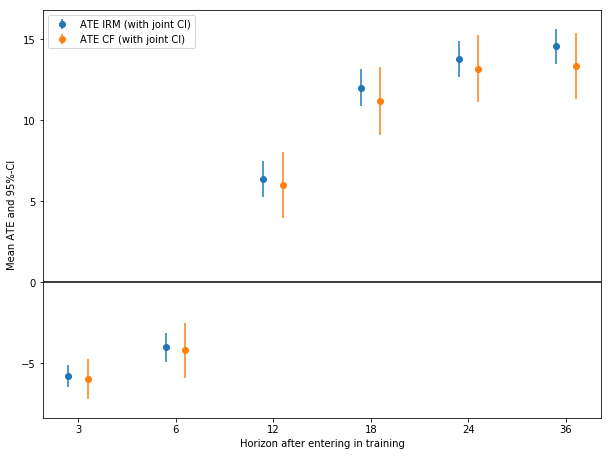

In [24]:

df_avg=df_avg_irm.join(df_avg_cf)

from matplotlib.transforms import Affine2D
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = 10., 7.5

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData


errors = np.full((2, df_avg.shape[0]), np.nan)
errors[0, :] = df_avg["irm_ate"] - df_avg["irm_low"]
errors[1, :] =  df_avg["irm_upp"]- df_avg["irm_ate"]

plt.errorbar(df_avg.index,df_avg["irm_ate"], fmt='o', yerr=errors, label='ATE IRM (with joint CI)',transform=trans1)





errors = np.full((2, df_avg.shape[0]), np.nan)
errors[0, :] = df_avg["cf_ate"] - df_avg["cf_low"]
errors[1, :] =  df_avg["cf_upp"]- df_avg["cf_ate"]

plt.errorbar(df_avg.index,df_avg["cf_ate"], fmt='o', yerr=errors, label='ATE CF (with joint CI)',transform=trans2)

plt.axhline(y = 0., color = 'black', linestyle = '-')



plt.xlabel('Horizon after entering in training')
plt.legend()
plt.ylabel('Mean ATE and 95%-CI')

plt.savefig(path+"/ATE_cetrif.png")


In [51]:
df_irm*=100
df_irm["cohorte"]=dates
hor_li=["3","6","12","24"]
li_fig=[]


for hor in hor_li:



    color_dict={"coef_emploi_quelconque_t_plus_"+hor:'red',"low_emploi_quelconque_t_plus_"+hor:"blue","upp_emploi_quelconque_t_plus_"+hor:"blue"}

    fig=px.line(df_irm, x="cohorte",y= ["coef_emploi_quelconque_t_plus_"+hor,"upp_emploi_quelconque_t_plus_"+hor,"low_emploi_quelconque_t_plus_"+hor]

               ,color_discrete_map = color_dict
               ,labels={"cohorte":"Months","value": "Estimates (in p.p.) "} ,title="Horizon t plus "+hor+ " months")

    fig.add_hline(y=0, line_width=1, line_color="black")




    fig['data'][2]['line']['width']=0.5
    fig['data'][1]['line']['width']=0.5
    fig['data'][2]['line']['dash']="dash"
    fig['data'][1]['line']['dash']="dash"

    fig['data'][0]['line']['width']=1


    newnames={ "coef_emploi_quelconque_t_plus_"+hor: "ATE",
                         "upp_emploi_quelconque_t_plus_"+hor: "Upper 95% interval",
                         "low_emploi_quelconque_t_plus_"+hor:"Lower 95% interval" }

    fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))




    li_fig.append(fig)
    
    
    
    

fig = make_subplots(rows=len(li_fig), cols=1,subplot_titles=("3 months horizon","6 months horizon","12 months horizon","24 months horizon")) 

for i, figure in enumerate(li_fig):
    for trace in range(len(figure["data"])):
        z=figure["data"][trace]

         
        fig.append_trace(z, row=i+1, col=1)
        
fig.update_layout(yaxis = dict(range=[-15, 20]))
fig.update_layout(yaxis2 = dict(range=[-15, 20]))
fig.update_layout(yaxis3 = dict(range=[-15, 20]))
fig.update_layout(yaxis4 = dict(range=[-15, 20]))
            
    
    
    
fig.add_hline(y=0, row=1, line_color="#000000", line_width=0.5)     
fig.add_hline(y=0, row=2, line_color="#000000", line_width=0.5)   
fig.add_hline(y=0, row=3, line_color="#000000", line_width=0.5) 
fig.add_hline(y=0, row=4, line_color="#000000", line_width=0.5) 
fig.show()

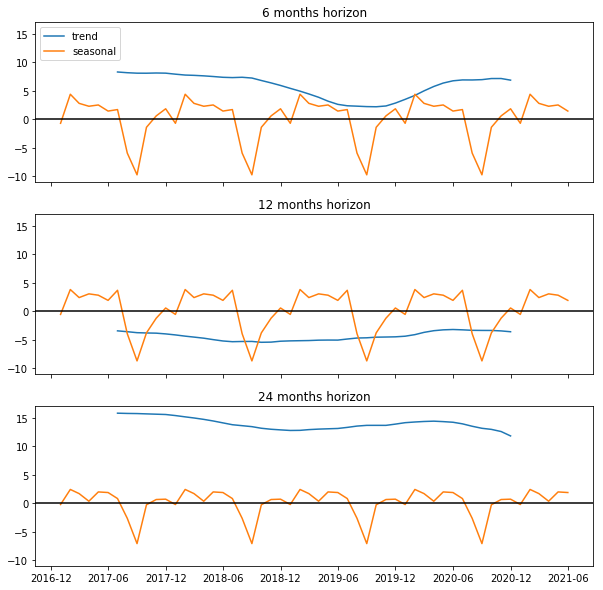

In [34]:

time=pd.date_range('2017-01-01','2021-07-01' , freq='1M')-pd.offsets.MonthBegin(1)
data=df_irm["coef_emploi_quelconque_t_plus_12"]

data.index=time

result1 = seasonal_decompose(data, model='additive')

data=df_irm["coef_emploi_quelconque_t_plus_6"]

data.index=time

result2 = seasonal_decompose(data, model='additive')


data=df_irm["coef_emploi_quelconque_t_plus_24"]

data.index=time

result3 = seasonal_decompose(data, model='additive')

fig, axs = plt.subplots(3,sharex=True, sharey=True)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].plot(result1.trend)
axs[0].plot(result1.seasonal)
axs[0].legend(loc='upper left')
axs[0].set_title('6 months horizon')
axs[0].axhline(y = 0, color = 'black', linestyle = '-')
axs[1].plot(result2.trend)
axs[1].plot(result2.seasonal)
axs[1].set_title('12 months horizon')
axs[1].axhline(y = 0, color = 'black', linestyle = '-')
axs[2].plot(result3.trend)
axs[2].plot(result3.seasonal)
axs[2].axhline(y = 0, color = 'black', linestyle = '-')
axs[2].set_title('24 months horizon')


plt.savefig("C:/Users/dalil.youcefi/Desktop/time_ser_decomposition.png")

